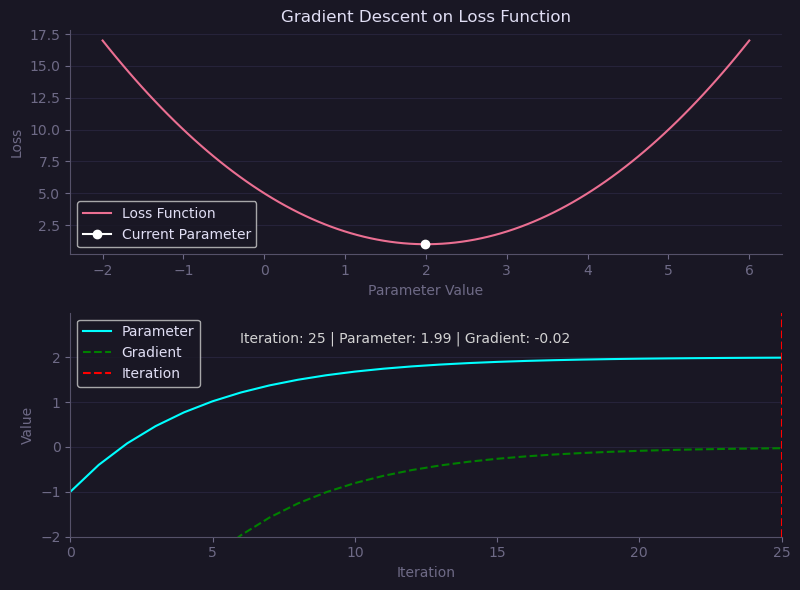

In [29]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

plt.style.use("C:\\Users\\TylerKleinbauer\\.matplotlib\\stylelib\\rose-pine.mplstyle")

# Loss function (example: a simple parabola)
def loss_function(x):
    return (x - 2)**2 + 1

# Gradient of the loss function
def gradient(x):
    return 2 * (x - 2)

# Gradient descent parameters
learning_rate = 0.1
initial_parameter = -1
iterations = 25

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# --- Upper Panel (Loss Function) ---
x_vals = np.linspace(-2, 6, 100)
ax1.plot(x_vals, loss_function(x_vals), label="Loss Function", linestyle='-')
marker, = ax1.plot([initial_parameter], [loss_function(initial_parameter)], color='white', marker='o', label="Current Parameter")
# gradient_arrow = ax1.annotate(
#     "", 
#     xy=(initial_parameter, loss_function(initial_parameter)),
#     xytext=(initial_parameter, loss_function(initial_parameter)),
#     arrowprops=dict(arrowstyle="->", color="black")
# )
ax1.set_xlabel("Parameter Value")
ax1.set_ylabel("Loss")
ax1.set_title("Gradient Descent on Loss Function")
ax1.legend()

# --- Lower Panel (Parameter and Gradient History) ---
parameter_history = [initial_parameter]
gradient_history = [gradient(initial_parameter)]
param_line, = ax2.plot([], [], color='cyan', linestyle='-', label="Parameter")
gradient_line, = ax2.plot([], [], color='green', linestyle='--', label="Gradient")
vertical_marker = ax2.axvline(x=0, color='red', linestyle='--', label="Iteration")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Value")
ax2.tick_params('y')
ax2.set_xlim(0, iterations)
ax2.set_ylim(-3, 3)
ax2.legend(loc="upper left")

#ax2_right = ax2.twinx()
#ax2_right.set_ylabel('Gradient', color='limegreen')
#ax2_right.tick_params('y', labelcolor='limegreen')
#ax2_right.set_ylim(-5, 5)

# Annotation for iteration, parameter, and gradient
annotation = ax2.text(0.05, 0.9, '', transform=ax2.transAxes)

# Create the subtitle text object once, positioned below the main title
subtitle = fig.text(
    0.5, 0.42,  # x, y position of the subtitle
    "",  # Initially empty
    fontsize=10, ha='center', color='lightgray'
)

# Animation update function
def animate(i):
    global parameter_history, gradient_history

    # Perform gradient descent step
    current_parameter = parameter_history[-1]
    current_gradient = gradient(current_parameter)
    new_parameter = current_parameter - learning_rate * current_gradient

    # Update histories
    parameter_history.append(new_parameter)
    gradient_history.append(current_gradient)

    # Update upper panel
    marker.set_data([new_parameter], [loss_function(new_parameter)])
    gradient_arrow.set_position((new_parameter, loss_function(new_parameter)))
    gradient_arrow.xy = (new_parameter - 0.1, loss_function(new_parameter))

    # Update lower panel
    param_line.set_data(range(len(parameter_history)), parameter_history)
    gradient_line.set_data(range(len(gradient_history)), gradient_history)
    vertical_marker.set_xdata([i + 1])  # Update as a list

    # Update the subtitle
    subtitle.set_text(
        f"Iteration: {i+1} | Parameter: {new_parameter:.2f} | Gradient: {current_gradient:.2f}"
    )

    # Adjust y-limits dynamically if necessary
    ax2.set_ylim(min(parameter_history) - 1, max(parameter_history) + 1)
    ax2_right.set_ylim(min(gradient_history) - 1, max(gradient_history) + 1)

    return marker, param_line, gradient_line, vertical_marker, annotation

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=iterations, interval=400, blit=False)

# Save the animation as a GIF using PillowWriter
from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=5)
ani.save("gradient_descent.gif", writer=writer)

plt.tight_layout()
plt.show()
